In [9]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

# Function to convert nii files to jpg
def convert_nii_to_jpg(input_folder, output_folder):
    for dirpath, dirnames, filenames in os.walk(input_folder):
        for filename in filenames:
            if filename.endswith('.nii'):
                file_path = os.path.join(dirpath, filename)
                img = nib.load(file_path)
                data = img.get_fdata()

                for i in range(data.shape[2]):
                    slice_2d = data[:, :, i]
                    slice_normalized = (slice_2d - slice_2d.min()) / (slice_2d.max() - slice_2d.min())
                    output_filename = f"{os.path.splitext(filename)[0]}_slice_{i}.jpg"
                    plt.imsave(os.path.join(output_folder, output_filename), slice_normalized, cmap='gray')

# Convert NII files from 'park_mri' dataset
convert_nii_to_jpg('park_mri', 'park_mri')


/var/folders/yj/yqcfblr90t300r535cxlh41h0000gn/T/ipykernel_11835/3488712654.py:15: RuntimeWarning: invalid value encountered in divide
  slice_normalized = (slice_2d - slice_2d.min()) / (slice_2d.max() - slice_2d.min())


In [10]:
from PIL import Image
import numpy as np

def resize_and_normalize_image(input_folder, output_folder, target_size=(224, 224)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for dirpath, dirnames, filenames in os.walk(input_folder):
        for filename in filenames:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(dirpath, filename)
                img = Image.open(img_path).convert('RGB')
                img = img.resize(target_size)

                # Normalize and save
                img_array = np.asarray(img) / 255.0
                img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))
                img_normalized.save(os.path.join(output_folder, filename))

# Resize and normalize 'alz_mri' dataset
resize_and_normalize_image('alzh_mri', 'alzh_mri')

# Resize and normalize 'park_mri' dataset
resize_and_normalize_image('park_mri', 'park_mri')


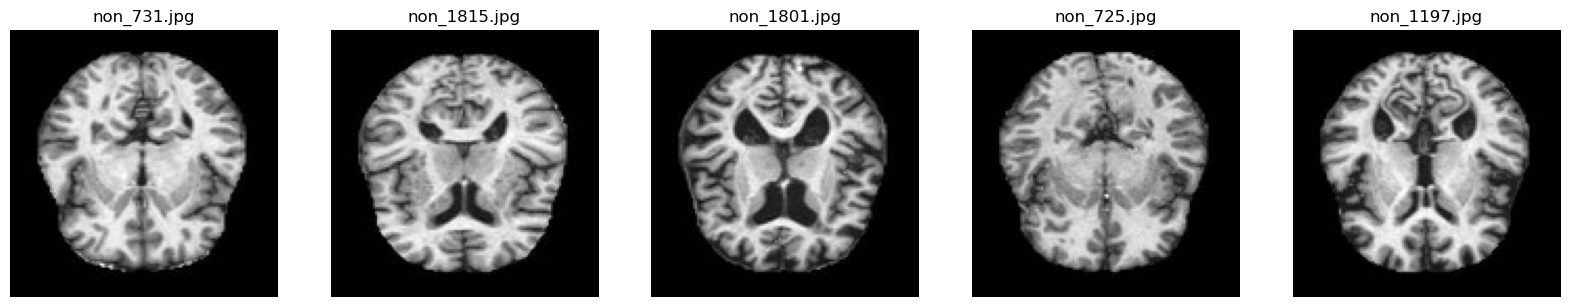

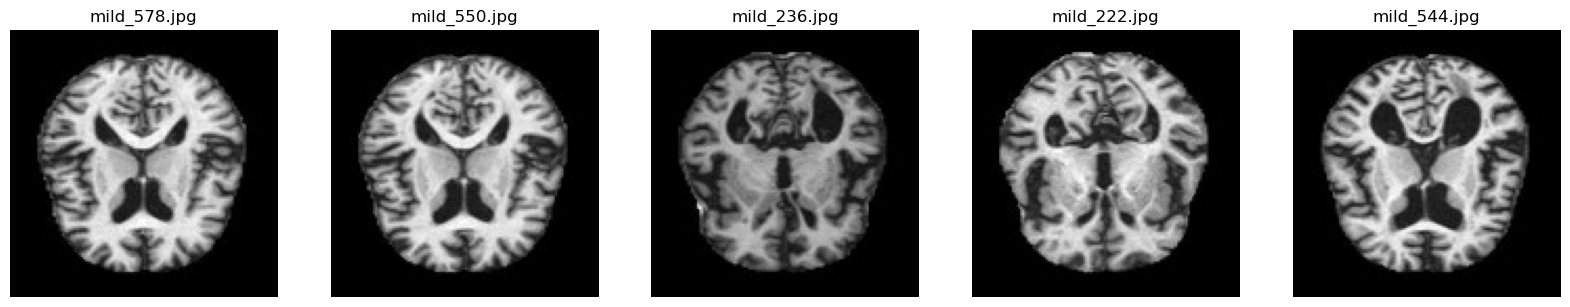

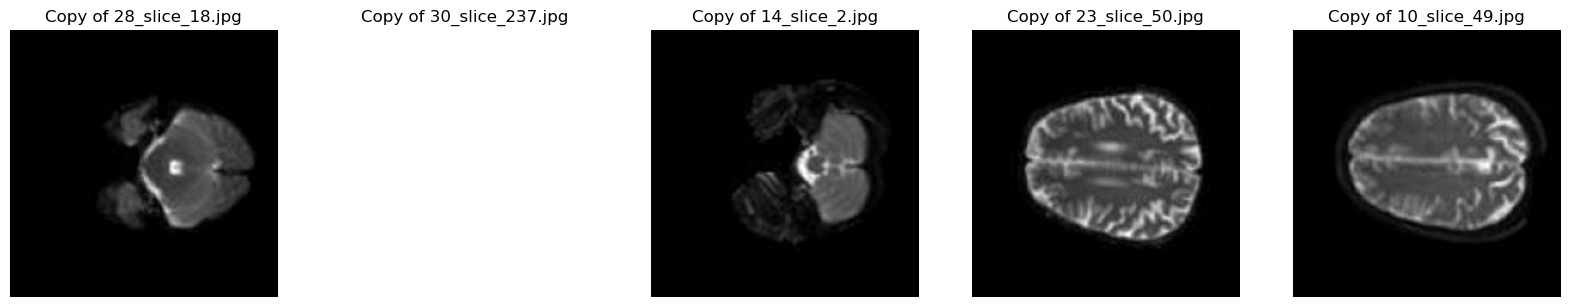

In [8]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def display_sample_images(folder, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4))
    
    files = [os.path.join(folder, file) for file in os.listdir(folder) if file.endswith('.jpg')]
    sample_files = files[:num_images]

    for ax, image_file in zip(axes, sample_files):
        image = Image.open(image_file)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title(os.path.basename(image_file))

    plt.show()

# Example: Display images from the 'alz_mri' folder
display_sample_images('alzh_mri/Non_Demented', num_images=5)
display_sample_images('alzh_mri/Mild_Demented', num_images=5)
# Example : Display images from the 'park_mri' folder
display_sample_images('park_mri', num_images=5)


In [12]:
import os
import shutil

# Define the source and destination directories
source_alz = 'alzh_mri'
source_park = 'park_mri'
dest_dir = 'organized_dataset'

# Create destination directories for each class
os.makedirs(os.path.join(dest_dir, 'Alzheimers'), exist_ok=True)
os.makedirs(os.path.join(dest_dir, 'Parkinsons'), exist_ok=True)
os.makedirs(os.path.join(dest_dir, 'None'), exist_ok=True)

# Function to copy and organize files
def organize_files(source_folder, dest_folder, class_name, subfolders=None):
    if subfolders:
        for subfolder in subfolders:
            full_path = os.path.join(source_folder, subfolder)
            for filename in os.listdir(full_path):
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                    shutil.copy(os.path.join(full_path, filename), os.path.join(dest_folder, class_name, filename))
    else:
        for filename in os.listdir(source_folder):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                shutil.copy(os.path.join(source_folder, filename), os.path.join(dest_folder, class_name, filename))

# Organize Alzheimer's images
alz_subfolders = ['Mild_Demented', 'Moderate_Demented', 'Very_Mild_Demented']
organize_files(source_alz, dest_dir, 'Alzheimers', alz_subfolders)

# Organize Parkinson's images
organize_files(source_park, dest_dir, 'Parkinsons')

# Organize None images
organize_files(source_alz, dest_dir, 'None', ['Non_Demented'])


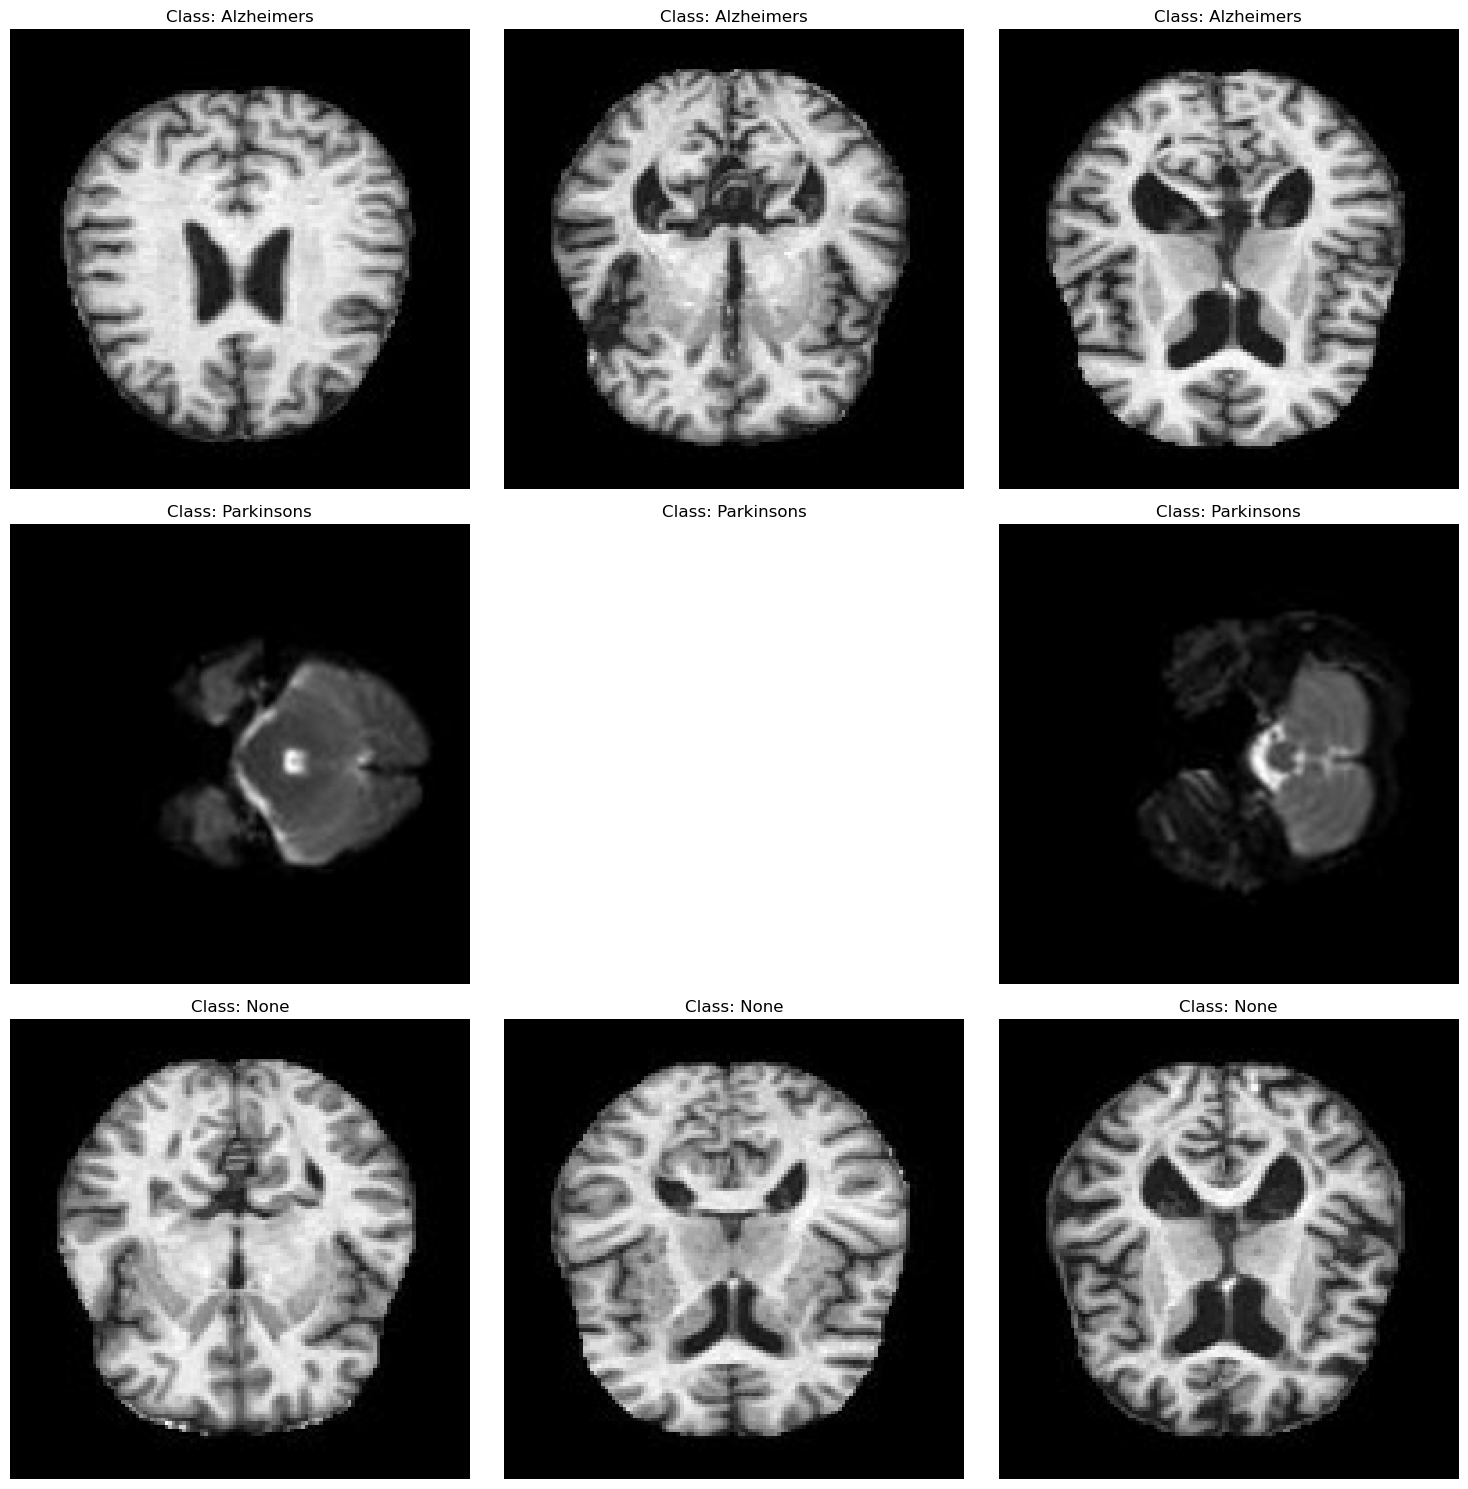

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def display_images_from_classes(base_folder, classes, num_images=3):
    fig, axes = plt.subplots(len(classes), num_images, figsize=(5*num_images, 5*len(classes)))

    for i, class_name in enumerate(classes):
        folder = os.path.join(base_folder, class_name)
        images = [os.path.join(folder, img) for img in os.listdir(folder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))][:num_images]
        for j, img_path in enumerate(images):
            img = Image.open(img_path)
            if len(classes) == 1:
                ax = axes[j]
            else:
                ax = axes[i, j]
            ax.imshow(img, cmap='gray')
            ax.axis('off')
            ax.set_title(f'Class: {class_name}')

    plt.tight_layout()
    plt.show()

# Define the base folder where your organized datasets are
base_folder = 'organized_dataset'  # Change this to your dataset folder

# Display images from each class
display_images_from_classes(base_folder, classes=['Alzheimers', 'Parkinsons', 'None'])


In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Base directories
base_dir = 'organized_dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create train, val, and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split and distribute files
def split_data(class_name):
    source_dir = os.path.join(base_dir, class_name)

    # Listing all files in the source directory
    all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

    # Splitting the files
    train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    # Function to copy files
    def copy_files(files, dest_dir):
        for f in files:
            shutil.copy(os.path.join(source_dir, f), os.path.join(dest_dir, class_name, f))

    # Creating subdirectories and copying files
    for dir in [train_dir, val_dir, test_dir]:
        os.makedirs(os.path.join(dir, class_name), exist_ok=True)

    copy_files(train_files, train_dir)
    copy_files(val_files, val_dir)
    copy_files(test_files, test_dir)

# Split and distribute files for each class
for class_name in ['Alzheimers', 'Parkinsons', 'None']:
    split_data(class_name)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the train, validation, and test directories
train_dir = os.path.join('organized_dataset', 'train')
val_dir = os.path.join('organized_dataset', 'val')
test_dir = os.path.join('organized_dataset', 'test')

# Set some parameters
batch_size = 32
target_size = (150, 150)

# Rescale all images by 1./255 and set up augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Note that validation data should not be augmented
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow test images in batches using val_datagen generator (no augmentation for testing)
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for test set to not shuffle for evaluation
)


Found 5455 images belonging to 3 classes.
Found 1819 images belonging to 3 classes.
Found 1819 images belonging to 3 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

# Model parameters
input_shape = (150, 150, 3)  # As used in the ImageDataGenerators
num_classes = 3  # Alzheimer's, Parkinson's, None

# Define the model
model = Sequential()
# Convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
# Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with 128 filters
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers before the fully connected layers
model.add(Flatten())
# Fully connected layer with 64 units and ReLU activation
model.add(Dense(64))
model.add(Activation('relu'))
# Dropout layer for regularization
model.add(Dropout(0.5))
# Output layer with a unit for each class and softmax activation
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [18]:
# Define the number of epochs to train for
epochs = 25

# Train the model using the training and validation generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


Epoch 1/25
170/170 [==============================] - 34s 201ms/step - loss: 0.7224 - accuracy: 0.5849 - val_loss: 0.5550 - val_accuracy: 0.7394
Epoch 2/25
170/170 [==============================] - 34s 202ms/step - loss: 0.5651 - accuracy: 0.6555 - val_loss: 0.4898 - val_accuracy: 0.6992
Epoch 3/25
170/170 [==============================] - 35s 206ms/step - loss: 0.5189 - accuracy: 0.6996 - val_loss: 0.4534 - val_accuracy: 0.7751
Epoch 4/25
170/170 [==============================] - 36s 211ms/step - loss: 0.5160 - accuracy: 0.7018 - val_loss: 0.4909 - val_accuracy: 0.6523
Epoch 5/25
170/170 [==============================] - 36s 212ms/step - loss: 0.4970 - accuracy: 0.7033 - val_loss: 0.4375 - val_accuracy: 0.7634
Epoch 6/25
170/170 [==============================] - 36s 213ms/step - loss: 0.4911 - accuracy: 0.7134 - val_loss: 0.4403 - val_accuracy: 0.7852
Epoch 7/25
170/170 [==============================] - 36s 214ms/step - loss: 0.4904 - accuracy: 0.7203 - val_loss: 0.4499 - val_ac

In [19]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print('Test accuracy:', test_accuracy)
print('Test loss:', test_loss)


56/56 [==============================] - 3s 55ms/step - loss: 0.4121 - accuracy: 0.7924
Test accuracy: 0.7924107313156128
Test loss: 0.4121318459510803


In [20]:
# To do:
#Data Augmentation for parkinsons(Rotate)
#Maybe try removing the mild_demented alz??